<a href="https://colab.research.google.com/github/mublify/LLMs/blob/main/Introduction/Introduction_Hugging_Face_%26_Pytorch%2C_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install datasets
%pip install evaluate
%pip install clean-text[gpl]
%pip install transformers
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install random
%pip install transformers[torch]
%pip install sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.6 MB/s eta 0:00:00
  P

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

In [ ]:
sentence='I am so excited to learn about LLMs'

In [ ]:
# prompt: get input IDs, token type IDs and attention mark for the sentence to be used for the dependencies imported earlier.

model_name = "bert-base-uncased" # Replace with your desired model
tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer(sentence, return_tensors="pt")

input_ids = inputs["input_ids"]
token_type_ids = inputs["token_type_ids"]
attention_mask = inputs["attention_mask"]

print("Input IDs:", input_ids)
print("Token Type IDs:", token_type_ids)
print("Attention Mask:", attention_mask)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Input IDs: tensor([[ 101, 1045, 2572, 2061, 7568, 2000, 4553, 2055, 2222, 5244,  102]])
Token Type IDs: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [ ]:
model=AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
with torch.no_grad():
    # Only provide input_ids and attention_mask to the DistilBERT model
    logits=model(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"]).logits

predicted_class_id=logits.argmax().item()
model.config.id2label[predicted_class_id]

'POSITIVE'

### Saving & Loading the models

In [ ]:
#Create the folder
model_directory='my_saved_models'

In [ ]:
#Save the model & tokenizer using save_pretrained
tokenizer.save_pretrained(model_directory)
model.save_pretrained(model_directory)

In [ ]:
#Load models using from_pretrained
mytokenizer=AutoTokenizer.from_pretrained(model_directory)
mymodel=AutoModelForSequenceClassification.from_pretrained(model_directory)


# BERT

In [ ]:
#IMPORTING DEPENDENCIES

from transformers import BertForQuestionAnswering, BertTokenizer
import torch

In [ ]:
model_name='bert-large-uncased-whole-word-masking-finetuned-squad'
model=BertForQuestionAnswering.from_pretrained(model_name)
tokenizer=BertTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
#Create Embeddings

question='What is the national day of Saudi Arabia'
context='Saudi Nationals celebrate their national day on the 23rd day of September'

In [ ]:
encoding=tokenizer(question,context)
print(encoding)

{'input_ids': [101, 2054, 2003, 1996, 2120, 2154, 1997, 8174, 9264, 102, 8174, 10342, 8439, 2037, 2120, 2154, 2006, 1996, 13928, 2154, 1997, 2244, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
inputs=encoding['input_ids']
sentence_embedding=encoding['token_type_ids']
tokens=tokenizer.convert_ids_to_tokens(inputs)

#### Passing these embeddings to the model

In [ ]:
output=model(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor(sentence_embedding))

In [ ]:
output

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-5.1198, -5.8994, -7.2322, -5.9993, -3.9491, -7.3416, -8.0306, -6.3684,
         -9.5259, -5.1196,  2.7737, -1.2430,  0.0267,  0.9732,  1.5710, -2.8483,
          0.9808,  2.3428,  3.0579, -2.1284, -3.8913,  0.6957, -5.1191]],
       grad_fn=<CloneBackward0>), end_logits=tensor([[-0.2214, -5.6376, -6.6260, -7.8502, -6.4827, -4.3810, -6.7832, -5.7074,
         -6.9420, -0.2212, -1.4991, -1.7310, -2.3688, -3.7206, -3.1430,  0.4370,
         -3.3661, -3.5939, -0.8081,  0.0430, -2.4664,  4.3789, -0.2219]],
       grad_fn=<CloneBackward0>), hidden_states=None, attentions=None)

#### Output

In [ ]:
start_index=torch.argmax(output.start_logits)
end_index=torch.argmax(output.end_logits)

In [ ]:
print(start_index,end_index)

tensor(18) tensor(21)


In [ ]:
answer=' '.join(tokens[start_index:end_index+1])
answer

'23rd day of september'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
s_scores=output.start_logits.detach().numpy().flatten()
e_scores=output.end_logits.detach().numpy().flatten()

In [ ]:
token_labels=[]
for (i,token) in enumerate(tokens):
  token_labels.append('{:} - {:>2}'.format(token,i))

<ipython-input-23-4fb53ec57af0>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


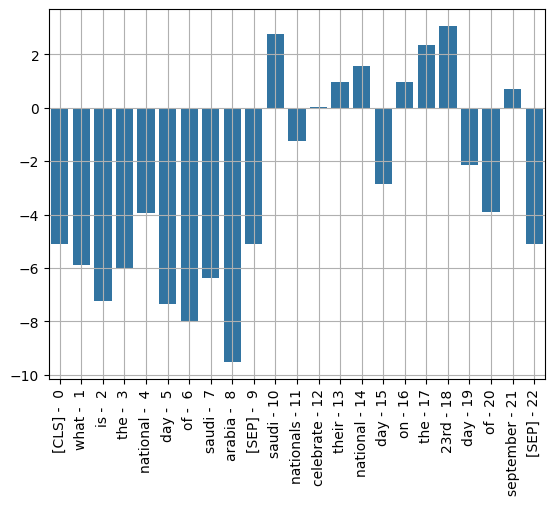

In [ ]:
ax=sns.barplot(x=token_labels, y=s_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.grid(True)

<ipython-input-24-87b653fccb61>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


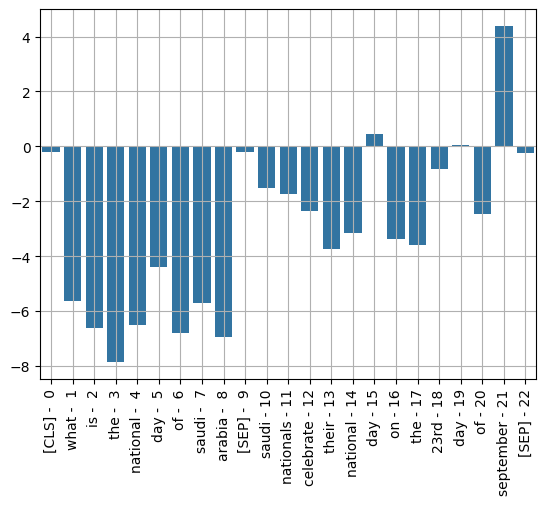

In [ ]:
ax=sns.barplot(x=token_labels, y=e_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.grid(True)

In [ ]:
qr_context= "Qatar Airways, the flag carrier of the State of Qatar, has solidified its position as a global aviation leader, renowned for its exceptional service, luxurious amenities, and extensive global network. Headquartered in Doha, Qatar Airways operates a diverse fleet of modern aircraft, including the Airbus A350, Boeing 787 Dreamliner, and Airbus A380, all equipped with state-of-the-art technology and premium cabin interiors. The airline's expansive network connects over 170 destinations across six continents, making it a convenient choice for travelers seeking seamless journeys to a wide range of global destinations. One of the key factors contributing to Qatar Airways' success is its unwavering commitment to providing world-class service. The airline's dedicated cabin crew, known for their warm hospitality and meticulous attention to detail, go above and beyond to ensure a memorable travel experience for every passenger. From gourmet dining experiences curated by renowned chefs to personalized entertainment options, Qatar Airways strives to exceed expectations and create a truly luxurious journey. The airline's spacious and well-appointed lounges at major airports offer travelers a tranquil retreat to relax, rejuvenate, and indulge in a range of amenities, including gourmet dining, premium beverages, and state-of-the-art business facilities. Beyond its exceptional service, Qatar Airways is also recognized for its innovative approach to travel. The airline has consistently pushed the boundaries of aviation technology, introducing cutting-edge features such as advanced in-flight entertainment systems, comfortable seating arrangements, and innovative cabin designs. Additionally, Qatar Airways' frequent flyer program, Privilege Club, rewards loyal customers with a range of exclusive benefits, including priority check-in, lounge access, complimentary upgrades, and exclusive travel experiences. With its focus on luxury, innovation, and exceptional service, Qatar Airways continues to be a preferred choice for discerning travelers worldwide Qatar Airways has also made significant strides in sustainability and environmental responsibility. The airline has implemented various initiatives to reduce its carbon footprint, including the use of sustainable aviation fuels, fuel-efficient aircraft, and advanced technologies to optimize flight operations. By prioritizing sustainability, Qatar Airways aims to minimize its environmental impact and contribute to a more sustainable future for aviation. In addition to its focus on passenger comfort and sustainability, Qatar Airways is also committed to fostering cultural exchange and promoting tourism. The airline's global network connects people from diverse cultures, facilitating international travel and tourism. By showcasing the rich cultural heritage of Qatar and other destinations, Qatar Airways aims to inspire travelers and contribute to the growth of the tourism industry."

In [ ]:
def faq_bot(question):
    context = qr_context
    input_ids = tokenizer.encode(question, context, max_length=512, truncation=True)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    sep_index = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_index + 1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0] * num_seg_a + [1] * num_seg_b
    output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)
    if answer_end >= answer_start:
        answer = ' '.join(tokens[answer_start:answer_end + 1])
    else:
        answer = 'I do not know the answer. Change your question.'

    corrected_answer = ''
    for word in answer.split():
        if word.startswith('##'):
            corrected_answer += word[2:]
        else:
            corrected_answer += ' ' + word
    corrected_answer = corrected_answer.strip()

    return corrected_answer


In [ ]:
faq_bot('What is Qatar Airways?')

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


'the flag carrier of the state of qatar'

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
model_name='roberta-base'
tokenizer=RobertaTokenizer.from_pretrained(model_name)
model=RobertaModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
model_name='distilbert-base-uncased'
tokenizer=DistilBertTokenizer.from_pretrained(model_name)
model=DistilBertModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import numpy as np
from cleantext import clean
import re
from transformers import XLNetTokenizer, XLNetForSequenceClassification, TrainingArguments, Trainer, pipeline
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
import datasets, evaluate, random

In [ ]:
train=pd.read_csv('emotion-labels-train.csv')
test=pd.read_csv('emotion-labels-test.csv')
val=pd.read_csv('emotion-labels-val.csv')

In [ ]:
print(train, test, val)

                                                   text    label
0     Just got back from seeing @GaryDelaney in Burs...      joy
1     Oh dear an evening of absolute hilarity I don'...      joy
2     Been waiting all week for this game ❤️❤️❤️ #ch...      joy
3     @gardiner_love : Thank you so much, Gloria! Yo...      joy
4     I feel so blessed to work with the family that...      joy
...                                                 ...      ...
3608  @VivienLloyd Thank you so much! Just home - st...  sadness
3609              Just put the winter duvet on ☃️❄️🌬☔️   sadness
3610  @SilkInSide @TommyJoeRatliff that's so pretty!...  sadness
3611  @BluesfestByron second artist announcement loo...  sadness
3612  I can literally eat creamy pesto pasta topped ...  sadness

[3613 rows x 2 columns]                                                    text    label
0     You must be knowing #blithe means (adj.)  Happ...      joy
1     Old saying 'A #smile shared is one gained for ...      joy


In [ ]:
df=pd.concat([train,test,val], ignore_index=True)
df

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
7097,Common app just randomly logged me out as I wa...,sadness
7098,"I'd rather laugh with the rarest genius, in be...",sadness
7099,If you #invest in my new #film I will stop ask...,sadness
7100,"Just watched Django Unchained, Other people ma...",sadness


In [ ]:
# prompt: remove emoji from df['text'] and save it to a new column 'text_clean'

import re

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['text_clean'] = df['text'].apply(remove_emoji)

In [ ]:
df['text_clean']=df['text_clean'].apply(lambda x: re.sub('a[^\s]+','',x))

In [ ]:
df['text_clean']

,text_clean
0,Just got b from seeing @G in Burslem. AMAZING!...
1,Oh de evening of hil I don't think I h l so ...
2,Been w week for this g #cheer #frid
3,"@g : Th you so much, Glori You're so sweet, t..."
4,I feel so blessed to work with the f th I n fo...
...,...
7097,Common just r logged me out I w writing the ...
7098,"I'd r l with the r genius, in be with his own..."
7099,If you #invest in my new #film I will stop yo...
7100,"Just w Dj Unch Other people m frown, but I tit..."


<Axes: xlabel='label'>

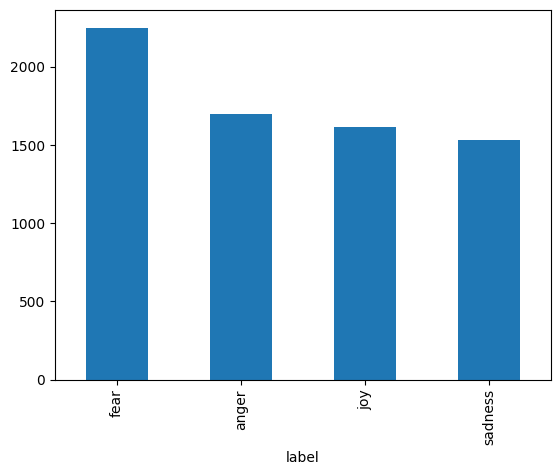

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
g=df.groupby('label')
df=pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

<ipython-input-40-96361a00eca6>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df=pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


<Axes: xlabel='label'>

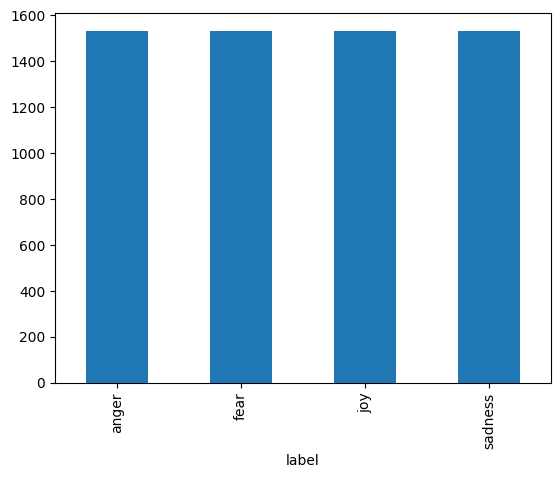

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
# prompt: Encode the df['label'] into integer

label_encoder = LabelEncoder()
df['label_int'] = label_encoder.fit_transform(df['label'])

In [ ]:
count_labels=4

In [ ]:
train_split, test_split=train_test_split(df, train_size=0.75)
train_split, val_split=train_test_split(train_split, train_size=0.9 )

print(len(train_split), len(val_split), len(test_split))

4139 460 1533


In [ ]:
train_split

text    label  \
label                                                                      
fear    657   If you ain't shaking no ass, don't ask me for ...     fear   
sadness 1294  Refuge Recovery Boston - Weds 7:30-9 pm. #heal...  sadness   
anger   681   BANG! Gordon #Brown has been accused of abusin...    anger   
sadness 1099  @marksandspencer Where has your 50% grapefruit...  sadness   
anger   263   @fixindk @RevoltRazor @dragons1015 Guys don't ...    anger   
...                                                         ...      ...   
fear    825   When's it all finished, you will discover that...     fear   
joy     183   Sometimes I get to sit back and be proud of my...      joy   
        672   @priny_baby happppy happppyyyyyy happppppyyyyy...      joy   
fear    206                                    I'm shaking now.     fear   
joy     216   It's the #FirstDayofFall and I'm so happy. Sip...      joy   

                                                     text_clean  label_int  
label                                                                       
fear    657   If you  sh no  don't  me for my liquor. Rule #1..          1  
sadness 1294  Refuge Recovery Boston - Weds 7:30-9 pm. #he #...          3  
anger   681            BANG! Gordon #Brown h been  of  a g #r p          0  
sadness 1099  @m Where h your 50% gr squ gone,not been  to g...          3  
anger   263   @fixindk @RevoltR @dr Guys don't use th type o...          0  
...                                                         ...        ...  
fear    825   When's it  finished, you will discover th it w...          1  
joy     183   Sometimes I get to sit b  be proud of myself f...          2  
        672   @priny_b h h h h birthd best friend!! Love you...          2  
fear    206                                         I'm sh now.          1  
joy     216   It's the #FirstD  I'm so h Sipping my #Pumpkin...          2  

[4139 rows x 4 columns]

In [ ]:
train_df=pd.DataFrame({
    "label":train_split.label_int.values,
    "text":train_split.text_clean.values
})

test_df=pd.DataFrame({
    "label":test_split.label_int.values,
    "text":test_split.text_clean.values
})

In [ ]:
train_df=datasets.Dataset.from_dict(train_df)
test_df=datasets.Dataset.from_dict(test_df)

In [ ]:
dataset_dict=datasets.DatasetDict({'train':train_df, 'test':test_df})
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 4139
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1533
    })
})

In [ ]:
tokenizer=XLNetTokenizer.from_pretrained('xlnet-base-cased')

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding='max_length', max_length=128, truncation=True)

In [ ]:
tokenized_datasets=dataset_dict.map(tokenize_function, batched=True)

Map:   0%|          | 0/4139 [00:00<?, ? examples/s]

Map:   0%|          | 0/1533 [00:00<?, ? examples/s]

In [ ]:
small_trainset=tokenized_datasets["train"].shuffle(seed=42).select(range(100))
small_evalset=tokenized_datasets["test"].shuffle(seed=42).select(range(100))

In [ ]:
model=XLNetForSequenceClassification.from_pretrained('xlnet-base-cased',
                                                     num_labels=count_labels,
                                                     id2label={0: 'anger', 1:'fear', 2:'joy', 3:'sadness'})

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
metric=evaluate.load("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels=eval_pred
    predictions=np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args=TrainingArguments(output_dir='test_trainer', evaluation_strategy='epoch', num_train_epochs=3)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer=Trainer(model=model, args=training_args,
                train_dataset=small_trainset,
                eval_dataset=small_evalset,
                compute_metrics=compute_metrics)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.395822,0.240000
2,No log,1.383593,0.310000
3,No log,1.397805,0.310000


TrainOutput(global_step=39, training_loss=1.4197469858022838, metrics={'train_runtime': 186.4588, 'train_samples_per_second': 1.609, 'train_steps_per_second': 0.209, 'total_flos': 21366375321600.0, 'train_loss': 1.4197469858022838, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 1.3978053331375122,
 'eval_accuracy': 0.31,
 'eval_runtime': 0.9663,
 'eval_samples_per_second': 103.487,
 'eval_steps_per_second': 13.453,
 'epoch': 3.0}

In [ ]:
model.save_pretrained('fine_tuned_model')

In [ ]:
fine_tuned_model=XLNetForSequenceClassification.from_pretrained('fine_tuned_model')

In [ ]:
clf=pipeline('text-classification', fine_tuned_model, tokenizer=tokenizer)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
rand_int=random.randint(0,len(val_split))
print(val_split['text_clean'][rand_int])
answer=clf(val_split['text_clean'][rand_int], top_k=None)
answer

<ipython-input-65-6146c3302ca8>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(val_split['text_clean'][rand_int])
<ipython-input-65-6146c3302ca8>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  answer=clf(val_split['text_clean'][rand_int], top_k=None)


So I tried to give her time to sober up, while w  the our friend's house. 2 hours l g w up out her n to vomit 


[{'label': 'fear', 'score': 0.37663328647613525},
 {'label': 'joy', 'score': 0.22719967365264893},
 {'label': 'anger', 'score': 0.19843564927577972},
 {'label': 'sadness', 'score': 0.19773146510124207}]